---

# Unit Cost vs Production Volume

### Using Polynomial Linear Regression

This project illustrates the process of creating a machine learning model to estimate the cost of producing goods, as their production volume increases or decreases. 

The phases of this project are as follows:
1. Import libraries
2. Import Dataset
3. Visualize the Dataset
4. Create the Training Dataset
5. Train & Fit the Model
6. Visualize Results

---

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import Dataset

In [21]:
df = pd.read_csv('datasets/EconomiesOfScale.csv')

In [22]:
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [23]:
df.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [24]:
 df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


### 3. Visualize the Dataset

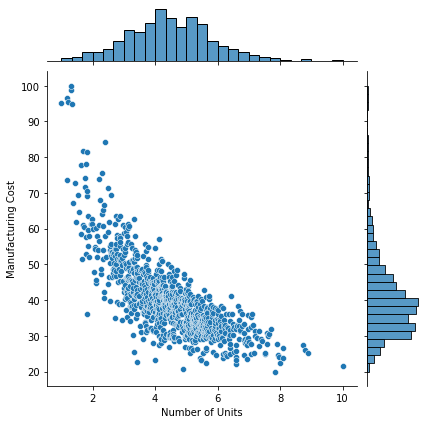

In [26]:
sns.jointplot(x = 'Number of Units', y = 'Manufacturing Cost', data=df)
plt.show()

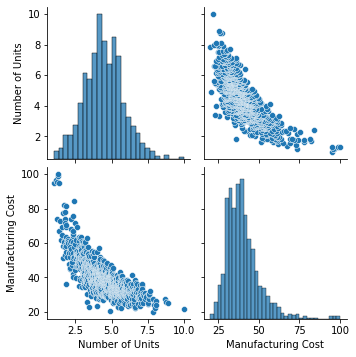

In [27]:
sns.pairplot(df)
plt.show()

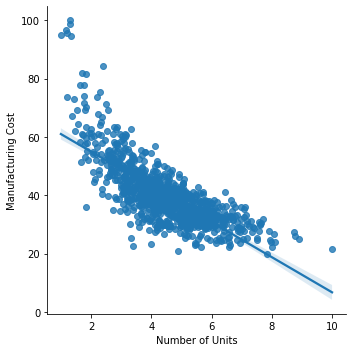

In [28]:
sns.lmplot(x = 'Number of Units', y = 'Manufacturing Cost', data=df)
plt.show()

Obviously this line is not adequate. Polynomial Regression is necessary. However, we will still compare with Simple Linear Regression.

## Assumption 1: Simple Linear Regression

 (Just for comparison)

### 4. Create Training Dataset

In [68]:
dataset = pd.read_csv('datasets/EconomiesOfScale.csv')
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [69]:
X_train = X
y_train = y
X_train.shape

(1000, 1)

### 5. Train & Fit

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
print('Model Coeff(m)', regressor.coef_)
print('Model Coeff(b)', regressor.intercept_)

Model Coeff(m) [-6.0333683]
Model Coeff(b) 67.03904193389238


### 6. Visualize Model Results

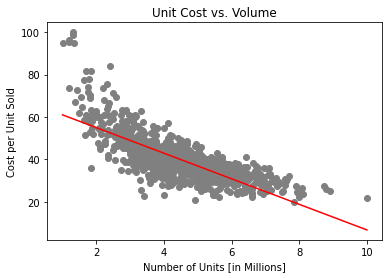

In [75]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Number of Units [in Millions]')
plt.ylabel('Cost per Unit Sold')
plt.title('Unit Cost vs. Volume')
plt.show()

Obviously, we need to move to Assumption 2: Polynomial Linear Regression

## Assumption 2: Polynomial Linear Regression

### 5. Train & Fit

In [139]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 8)

In [140]:
X_columns = poly_regressor.fit_transform(X_train)

In [141]:
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, ...,
        2.78287808e+00, 3.30047573e+00, 3.91434326e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, ...,
        2.86128624e+00, 3.40921866e+00, 4.06207940e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, ...,
        4.58385280e+05, 4.02502986e+06, 3.53433369e+07],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, ...,
        4.96211090e+05, 4.41513727e+06, 3.92845656e+07],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, ...,
        1.00000000e+06, 1.00000000e+07, 1.00000000e+08]])

In [142]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [143]:
print('Model Coefficients', regressor.coef_)

Model Coefficients [ 0.00000000e+00 -5.08823474e+02  3.83266938e+02 -1.64177046e+02
  4.25699360e+01 -6.80600753e+00  6.55232724e-01 -3.47831012e-02
  7.81030400e-04]


### 6. Visualize Model Results

In [144]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

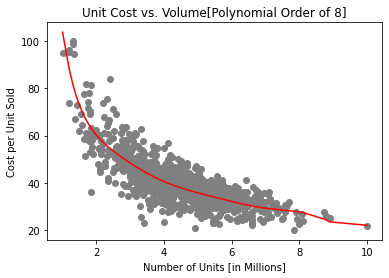

In [146]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, y_predict, color = 'red')
plt.xlabel('Number of Units [in Millions]')
plt.ylabel('Cost per Unit Sold')
plt.title('Unit Cost vs. Volume[Polynomial Order of 8]')
plt.show()